In [1]:
import numpy as np
import sys
import random
from matplotlib import pyplot as plt

In [2]:
play_length = 20
play_width = 20
hider_vision = 1
seeker_vision = 1
timer = 50

default_movement = np.array([1,1,1,1,1,1,1,1,1])
direction_arr = np.array([[-1, -1], [0, -1], [1, -1],
                          [-1, 0], [0, 0], [1, 0],
                          [-1, 1], [0, 1], [1, 1]])

mutation_chance = 0.05

num_rocks = 20

np.set_printoptions(threshold=sys.maxsize)

In [3]:
#hider pre-sets
hider0 = [[-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1], [-1, -1]]
hider1 = [[1, -1], [1, -1], [1, -1], [1, -1], [1, -1], [1, -1], [1, -1], [1, -1], [1, -1]]
hider2 = [[-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1]]
hider3 = [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
hider4 = [[-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0],
         [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
hider5 = [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0],
         [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1]]

while(len(hider0) != 50):
    hider0.append([0, 0])
    
while(len(hider1) != 50):
    hider1.append([0, 0])
    
while(len(hider2) != 50):
    hider2.append([0, 0])
    
while(len(hider3) != 50):
    hider3.append([0, 0])
    
while(len(hider4) != 50):
    hider4.append([0, 0])
    
while(len(hider5) != 50):
    hider5.append([0, 0])
    
hideStrats = [hider0, hider1, hider2, hider3, hider4, hider5]

In [4]:
def normalize(x):
    arr = x.copy()
    #arr = np.reshape(x.copy(), (9, 1))
    best = arr[0]
    worst = arr[0]
    
    for i in range(len(arr)):
        if arr[i] > best:
            best = arr[i]
        if arr[i] < worst:
            worst = arr[i]
    
    best += 0.05
    worst -= 0.05
    
    arr -= worst
    
    if best-worst == 0:
        return np.ones((len(arr), 1))
        
    arr /= (best - worst)
    return arr
    #return np.reshape(arr, (3, 3))

In [5]:
def merge(left, right):
    #print("Left")
    #print(left)
    #print("Right")
    #print(right)
    #print("Left[0]")
    #print(left[0])
    if len(left) == 0:
        return right
    
    if len(right) == 0:
        return left
    
    result = []
    tag = []
    index_left = index_right = 0
    
    while len(result) < len(left[0]) + len(right[0]):
        if left[0][index_left] <= right[0][index_right]:
            result.append(left[0][index_left])
            tag.append(left[1][index_left])
            
            index_left += 1
        else:
            result.append(right[0][index_right])
            tag.append(right[1][index_right])
            
            index_right += 1
            
        if index_left == len(left[0]):
            for i in range(index_right, len(right[0])):
                result.append(right[0][i])
                tag.append(right[1][i])
            break
        
        if index_right == len(right[0]):
            for i in range(index_left, len(left[0])):
                result.append(left[0][i])
                tag.append(left[1][i])
            break
            
    #print("Result")
    #print(result)
    #print("Tag")
    #print(tag)
    
    return (result, tag)

def merge_sort(arr, tag_along):
    if len(arr) < 2:
        return (arr, tag_along)
    else:
        midpoint = len(arr) // 2
        return merge(left = merge_sort(arr[:midpoint], tag_along[:midpoint]), right = merge_sort(arr[midpoint:], tag_along[midpoint:]))

In [6]:
class Statistics:
    def __init__(self):
        self.avgSeekWinFit = []
        self.avgSeekFit = []
        self.avgHideWinFit = []
        self.avgSeekWinRatio = []
        self.avgTime = []
        self.bestTime = []
        
    def printSeekFit(self):
        plt.plot(self.avgSeekWinFit)
        plt.title('Average Seeker Fitness of the top 20% per Generation')
        plt.ylabel('Fitness')
        plt.xlabel('Generation')
        plt.show()
        
    def printSeekAvgFit(self):
        plt.plot(self.avgSeekFit)
        plt.title('Average Seeker Fitness per Generation')
        plt.ylabel('Fitness')
        plt.xlabel('Generation')
        plt.show()
        
    def printHideFit(self):
        plt.plot(self.avgHideFit)
        plt.title('Average Hider Fitness of the top 20% per Generation')
        plt.ylabel('Fitness')
        plt.xlabel('Generation')
        plt.show()
    
    def printSeekWin(self):
        plt.plot(self.avgSeekWinRatio)
        plt.title('Average Seeker Win Percentage per Generation')
        plt.ylabel('Win Percentage')
        plt.xlabel('Generation')
        plt.show()
        
    def printFastestGame(self):
        plt.plot(self.bestTime)
        plt.title('Fastest Seeker Win per Generation')
        plt.ylabel('Time in Moves')
        plt.xlabel('Generation')
        plt.show()
        
    def printAverageGame(self):
        plt.plot(self.avgTime)
        plt.title('Average Game Length per Generation')
        plt.ylabel('Time in Moves')
        plt.xlabel('Generation')
        plt.show()
        
    def printAvgSeekAcc(self):
        plt.plot(self.avgSeekAcc)
        plt.title('Average Accuracy for Seekers per Generation')
        plt.ylabel('Accuracy')
        plt.xlabel('Generation')
        plt.show()
        
    def printAvgHideArr(self):
        for i in range(len(self.avgHideArr)):
            plt.plot(self.avgHideArr[i])
            plt.title('Average Value of Bias ' + str(i) + ' for Hiders per Generation')
            plt.ylabel('Value')
            plt.xlabel('Generation')
            plt.show()
            
    def printAvgSeekArr(self):
        for i in range(len(self.avgSeekArr)):
            plt.plot(self.avgSeekArr[i])
            plt.title('Average Value of Bias ' + str(i) + ' for Seekers per Generation')
            plt.ylabel('Value')
            plt.xlabel('Generation')
            plt.show()

In [7]:
class Record:
    def __init__(self, hider_arr, seeker_arr):
        self.seekWin = False
        self.timeTaken = 0
        self.turnRecord = []
        self.hider_arr = hider_arr
        self.seeker_arr = seeker_arr
        
        # arr structure:
        # 0 - smell bias
        # 1 - distance from center bias
        # 2 - active movement bias
        # 3 - previous movement bias
        # 4 - timer bias
        # 5 - passive bias
        # 6 - 
        
    def __str__(self):
        return "Results of game:\nSeeker win? " + str(self.seekWin) + "\nGame ended in " + str(self.timeTaken) + " turns\nSeeker fitness = " + str(self.seekFit) + "\nHider fitness = " + str(self.hideFit)
        
    def initPlayground(self):
        self.playground = Playground(play_length, play_width)
        
    def updateTurnRecord(self, stage, playground):
        if stage == 0:
            self.turnRecord.append([playground.hider.getPosition(), (-1, -1)])
        else:
            self.turnRecord.append([playground.hider.getPosition(), playground.seeker.getPosition()])
        
    def recordResult(self, result, time):
        if result == 0:
            self.seekWin = True
            self.timeTaken = time
        else:
            self.seekWin = False
            self.timeTaken = time
            
        self.hideFit = getFitness(False, self, 0)
        self.seekFit = getFitness(True, self, self.hideFit)

In [8]:
class Playground:
    def __init__(self, length, width, decay_rate=0.02):
        self.length = length
        self.width = width
        self.grid = np.ones((length, width))
        self.scents = np.ones((length, width))
        self.decay_rate = decay_rate
        self.rocks = np.zeros((length, width))
        
        for i in range(num_rocks):
            x = random.randint(0, length-1)
            y = random.randint(0, width-1)
            
            while((x == length//2 + 1 and y == width//2 + 1) or self.rocks[x, y] == 1):
                x = random.randint(0, length-1)
                y = random.randint(0, width-1)
                
            self.rocks[x, y] = 1
        
    def initHider(self):
        self.hider = Hider(self.length, self.width, hider_vision, self)
        
    def initSeeker(self):
        self.seeker = Seeker(self.length, self.width, seeker_vision, self)
        
    def updateScents(self, stage):
        for i in range(self.length):
            for j in range(self.width):
                if self.scents[i, j] <= 2 and self.scents[i, j] > 1:
                    self.scents[i, j] -= self.decay_rate
        
        pos = self.hider.getPosition()
        
        self.scents[pos[0], pos[1]] = 2
        
        self.hider.sniff(self.scents)
        
        if stage == 1:
            self.seeker.sniff(self.scents)

class Hider:
    def __init__(self, length, width, vision, playground):
        self.id = 2
        self.x = length // 2 + 1
        self.y = width // 2 + 1
        self.vision = vision
        playground.grid[self.x, self.y] = self.id
        self.sighted = np.ones((self.vision*2 + 1, self.vision*2 + 1))
        self.smells = np.ones((self.vision*2 + 1, self.vision*2 + 1))
        self.seeGrid(playground)
        self.movement = np.zeros((3, 3))
        self.time = 0
        
    #def updateMovement(self, arr):
        #print(np.asarray(arr))
        #print(self.sighted)
        #print(self.smells)
        #layer1 = np.matmul(np.reshape(arr.copy(), (3, 3)), self.sighted)
        
        #for i in range(3):
        #    for j in range(3):
        #        layer1[i, j] += distanceFunc((play_length // 2 + 1, play_width // 2 + 1), (self.x + i - 1, self.y + j - 1))
        
        #layer2 = np.matmul(layer1, self.smells)
        
        #for i in range(3):
        #    for j in range(3):
        #        layer2[i, j] -= self.smells[i, j]
        
        #self.movement = normalize(np.reshape(layer2, (3, 3)))
        
    def updateMovement(self, arr):
        #print(np.asarray(arr))
        #print(self.sighted)
        #print(self.smells)
        layer1 = self.smells * arr[0] # smell bias
        
        dist = np.ones((3, 3))
        
        for i in range(3):
            for j in range(3):
                dist[i][j] = distanceFunc((self.x + i - 1, self.y + j - 1), (play_length//2 + 1, play_width//2 + 1))
                
        layer2 = dist * arr[1] # distance from center bias
        layer = np.matmul(layer1, layer2)
        
        layer3 = np.ones((3, 3)) * arr[2] # active movement bias
        layer3[1][1] = 0 # staying still is not active
        layer = np.matmul(layer, layer3)
        
        layer4 = self.movement * arr[3] # previous movement bias
        layer = np.matmul(layer, layer4)
        
        layer5 = np.ones((3, 3)) * self.time / timer * arr[4] # timer bias
        layer = np.matmul(layer, layer5)
        
        layer6 = np.zeros((3, 3))
        layer6[1][1] = 1 * arr[5] # passive bias
        layer = np.reshape(np.matmul(layer, layer6), (9, 1))
        layer = np.reshape(normalize(layer), (3, 3))
        
        for i in range(3):
            for j in range(3):
                if self.x + i - 1 < 0 or self.x + i - 1 >= play_length or self.y + j - 1 < 0 or self.y + j - 1 >= play_width:
                    layer[i][j] = 0
        
        self.movement = layer
        
        #for i in range(3):
        #    for j in range(3):
        #        layer1[i][j] = np.reshape(arr, (3, 3))[i][j] + self.sighted[i][j]
        #        layer2[i][j] = np.reshape(smell_bias, (3, 3))[i][j] + self.smells[i][j]
        
        #layer3 = np.matmul(layer1, layer2)
        
        #for i in range(3):
        #    for j in range(3):
        #        layer2[i, j] += self.smells[i, j]
        
        #self.movement = normalize(np.reshape(layer3, (3, 3)))
        
    def getPosition(self):
        return (self.x, self.y)
    
    def sniff(self, scents):
        for i in range(self.x - self.vision, self.x + self.vision + 1):
            for j in range(self.y - self.vision, self.y + self.vision + 1):
                if i < 0 or i >= play_length:
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = 0
                elif j < 0 or j >= play_width:
                    #print("Invalid width")
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = 0
                else:
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = scents[i, j]
        
    def seeGrid(self, playground):
        for i in range(self.x - self.vision, self.x + self.vision + 1):
            for j in range(self.y - self.vision, self.y + self.vision + 1):
                if i < 0 or i >= play_length:
                    #print("Invalid length")
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = 0
                elif j < 0 or j >= play_width:
                    #print("Invalid width")
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = 0
                else:
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = playground.grid[i, j]
        
    def move(self, delta_length, delta_width, playground):
        if delta_length == 0 and delta_width == 0:
            return 0
        elif self.x + delta_length < 0 or self.x + delta_length >= play_length:
            #print("Invalid length")
            return -1
        elif self.y + delta_width < 0 or self.y + delta_width >= play_width:
            #print("Invalid width")
            return -1
        elif playground.grid[self.x + delta_length, self.y + delta_width] != 1:
            #print("Something's already there")
            return -1
        elif playground.rocks[self.x + delta_length, self.y + delta_width] == 1:
            #print("There's a rock there")
            return -1
        else:
            playground.grid[self.x, self.y] = 1
            self.x += delta_length
            self.y += delta_width
            playground.grid[self.x, self.y] = self.id
            self.seeGrid(playground)
            return 0
        
    def arrMove(self, playground):
        options = merge_sort(np.reshape(self.movement.copy(), (1, 9))[0], direction_arr.copy())
        i = 0
        anyMove = 0
        
        #print(options)
        
        while True:
            while(options[0][i] == 0 and anyMove != 9):
                i = (i + 1) % 9
                anyMove += 1
                
            if anyMove == 9:
                self.move(0, 0, playground)
                self.time += 1
                break
            else:
                anyMove = 0
                    
            attempt = random.random()
            
            if(attempt <= options[0][i]):
                moveCheck = self.move(options[1][i][0], options[1][i][1], playground)
                
                if moveCheck != -1:
                    self.time += 1
                    break
            
            i = (i + 1) % 9
        
    #def arrMove(self, playground, move):
    #    self.move(hideStrats[self.hideType][move][0], hideStrats[self.hideType][move][1], playground)
        #options = merge_sort(np.reshape(self.movement.copy(), (1, 9))[0], direction_arr.copy())
        #i = 0
        
        #print(options)
        
        #while True:
        #    attempt = random.random()
            
        #    if(attempt <= options[0][i]):
        #        moveCheck = self.move(options[1][i][0], options[1][i][1], playground)
                
        #        if moveCheck != -1:
        #            break
            
        #    i = (i + 1) % 9

class Seeker:
    def __init__(self, length, width, vision, playground):
        self.id = 3
        self.x = length // 2 + 1
        self.y = width // 2 + 1
        self.vision = vision
        playground.grid[self.x, self.y] = self.id
        self.sighted = np.ones((self.vision*2 + 1, self.vision*2 + 1))
        self.smells = np.ones((self.vision*2 + 1, self.vision*2 + 1))
        self.seeGrid(playground)
        self.movement = np.ones((3, 3))
        self.time = 0
        self.accuracy = 1
        
    def getPosition(self):
        return (self.x, self.y)
        
    def updateMovement(self, arr):
        #print(np.asarray(arr))
        #print(self.sighted)
        #print(self.smells)
        layer1 = self.smells * arr[0] # smell bias
        
        dist = np.ones((3, 3))
        
        for i in range(3):
            for j in range(3):
                dist[i][j] = distanceFunc((self.x + i - 1, self.y + j - 1), (play_length//2 + 1, play_width//2 + 1))
                
        layer2 = dist * arr[1] # distance from center bias
        layer = np.matmul(layer1, layer2)
        
        layer3 = np.ones((3, 3)) * arr[2] # active movement bias
        layer3[1][1] = 0 # staying still is not active
        layer = np.matmul(layer, layer3)
        
        layer4 = self.movement * arr[3] # previous movement bias
        layer = np.matmul(layer, layer4)
        
        layer5 = np.ones((3, 3)) * self.time / timer * arr[4] # timer bias
        layer = np.matmul(layer, layer5)
        
        layer6 = np.zeros((3, 3))
        layer6[1][1] = 1 * arr[5] # passive bias
        layer = np.reshape(np.matmul(layer, layer6), (9, 1))
        layer = np.reshape(normalize(layer), (3, 3))
        
        for i in range(3):
            for j in range(3):
                if self.x + i - 1 < 0 or self.x + i - 1 >= play_length or self.y + j - 1 < 0 or self.y + j - 1 >= play_width:
                    layer[i][j] = 0
        
        self.movement = layer
        
        #for i in range(3):
        #    for j in range(3):
        #        layer1[i][j] = np.reshape(arr, (3, 3))[i][j] + self.sighted[i][j]
        #        layer2[i][j] = np.reshape(smell_bias, (3, 3))[i][j] + self.smells[i][j]
        
        #layer3 = np.matmul(layer1, layer2)
        
        #for i in range(3):
        #    for j in range(3):
        #        layer2[i, j] += self.smells[i, j]
        
        #self.movement = normalize(np.reshape(layer3, (3, 3)))
        
    def sniff(self, scents):
        for i in range(self.x - self.vision, self.x + self.vision + 1):
            for j in range(self.y - self.vision, self.y + self.vision + 1):
                if i < 0 or i >= play_length:
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = 0
                elif j < 0 or j >= play_width:
                    #print("Invalid width")
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = 0
                else:
                    self.smells[i - self.x + self.vision, j - self.y + self.vision] = scents[i, j]
        
    def seeGrid(self, playground):
        for i in range(self.x - self.vision, self.x + self.vision + 1):
            for j in range(self.y - self.vision, self.y + self.vision + 1):
                if i < 0 or i >= play_length:
                    #print("Invalid length")
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = 0
                elif j < 0 or j >= play_width:
                    #print("Invalid width")
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = 0
                else:
                    self.sighted[i - self.x + self.vision, j - self.y + self.vision] = playground.grid[i, j]

    def move(self, delta_length, delta_width, playground):
        if delta_length == 0 and delta_width == 0:
            return 0
        elif self.x + delta_length < 0 or self.x + delta_length >= play_length:
            #print("Invalid length")
            return -1
        elif self.y + delta_width < 0 or self.y + delta_width >= play_width:
            #print("Invalid width")
            return -1
        elif playground.grid[self.x + delta_length, self.y + delta_width] != 1:
            #print("Something's already there")
            return -1
        elif playground.rocks[self.x + delta_length, self.y + delta_width] == 1:
            #print("There's a rock there")
            return -1
        else:
            if delta_length != 0 and delta_width != 0:
                hider_pos = playground.hider.getPosition()
                delta_pos = (hider_pos[0] - self.x, hider_pos[1] - self.y)
                theta = np.arccos((delta_pos[0]*delta_length + delta_pos[1]*delta_width)/(distanceFunc((0,0), delta_pos) * distanceFunc((0,0), (delta_length, delta_width))))
                self.accuracy += (2 * np.pi - (theta * np.pi / 180))/(2 * np.pi)
            else:
                self.accuracy += 0
            playground.grid[self.x, self.y] = 1
            self.x += delta_length
            self.y += delta_width
            playground.grid[self.x, self.y] = self.id
            self.seeGrid(playground)
            return 0
                    
    def arrMove(self, playground):
        options = merge_sort(np.reshape(self.movement.copy(), (1, 9))[0], direction_arr.copy())
        i = 0
        anyMove = 0
        
        #print(options)
        
        while True:
            while(options[0][i] == 0 and anyMove != 9):
                i = (i + 1) % 9
                anyMove += 1
                
            if anyMove == 9:
                self.move(0, 0, playground)
                self.time += 1
                break
            else:
                anyMove = 0
                    
            attempt = random.random()
            
            if(attempt <= options[0][i]):
                moveCheck = self.move(options[1][i][0], options[1][i][1], playground)
                
                if moveCheck != -1:
                    self.time += 1
                    break
            
            i = (i + 1) % 9
        
    def checkForHider(self):
        for i in range(self.vision*2 + 1):
            for j in range(self.vision*2 + 1):
                if(self.sighted[i, j] == 2):
                    #print("Found you!")
                    return 0
        return 1

In [9]:
def distanceFunc(pos1, pos2):
    return np.sqrt((pos2[0] - pos1[0]) * (pos2[0] - pos1[0]) + (pos2[1] - pos1[1]) * (pos2[1] - pos1[1]))

def getFitness(isSeeker, record, hideFit):
    fitness = 100
    
    if isSeeker is True:
        if record.seekWin is False:
            fitness *= 2/3
        
        fitness *= record.playground.seeker.accuracy / (record.timeTaken + 1)
        fitness *= distanceFunc(record.playground.hider.getPosition(), (play_length // 2 + 1, play_width // 2 + 1))
        fitness /= record.timeTaken + 1
        
        if record.playground.hider.getPosition() != record.playground.seeker.getPosition():
            fitness /= distanceFunc(record.playground.hider.getPosition(), record.playground.seeker.getPosition())
        
        fitness += hideFit
    else:
        if record.timeTaken == 0:
            return fitness
            
        fitness *= record.timeTaken / timer
        fitness *= distanceFunc(record.playground.hider.getPosition(), record.playground.seeker.getPosition())
        fitness *= distanceFunc(record.playground.hider.getPosition(), (play_length // 2 + 1, play_width // 2 + 1))
        
    return fitness

In [10]:
#def hideStage(playground, timer):    
#    hider = Hider(play_length, play_width, hider_vision, playground)
#    
#    for i in range(timer):
#        hider.arrMove(playground)
#        playground.updateScents(hider)
#        hider.updateMovement(default_movement)
#    
#    return hider

In [11]:
#def seekStage(playground, timer, hider):
#    time = timer
#    found = False
#    
#    if(hider.getPosition() == (play_length // 2 + 1, play_width // 2 + 1)):
#        #print("You didn't even move!")
#        return 0
#    
#    seeker = Seeker(play_length, play_width, seeker_vision, playground)
#    
#    while found is False and time > 0:
#        seeker.arrMove(playground)
#        seeker.updateMovement(default_movement)
#        
#        if time % 3 == 0:
#            hider.arrMove(playground)
#            hider.updateMovement(default_movement)
#            
#        playground.updateScents(hider)
#        
#            
#        if seeker.checkForHider() == 0:
#            found = True
#            
#        time -= 1
#    
#    if found is True:
#        #print("Won in " + str(time) + " turns!")
#        return 0
#    else:
#        return 1

In [12]:
#def manualGame():
#    k = True
#    
#    while k is True:
#        playground = Playground(play_length, play_width)
#        
#        hider = hideStage(playground, timer)
#        print(playground)
#        print()
#        victory = seekStage(playground, timer, hider)
#        print(playground)
#        print()
#        
#        if victory == 0:
#            print("Seeker wins!")
#        else:
#            print("Hider wins!")
#            
#        check = input("Game Over!\nWould you like to play again? (y/n) ")
#        print()
#        
#        if(check != 'y'):
#            k = False

In [13]:
#def autoGame(num):
#    seekWins = 0
#    expPrint = 1
#    
#    for i in range(1, num+1):
#        playground = Playground(play_length, play_width)
#        
#        hider = hideStage(playground, timer)
#        victory = seekStage(playground, timer, hider)
#        
#        if victory == 0:
#            seekWins += 1
#            
#        if i % expPrint == 0:
#            print("Completed " + str(expPrint) + " games...")
#            expPrint *= 2
#            
#    print("\nFinished!")
#    print(str(num) + " games played")
#    print("Win percentage for Seeker is " + str(100 * (seekWins / num)) + "%")

In [14]:
def genHide(record):
    record.playground.initHider()
    
    record.updateTurnRecord(0, record.playground)
    record.playground.updateScents(0)
    
    for i in range(timer):
        record.playground.hider.updateMovement(record.hider_arr.copy())
        record.playground.hider.arrMove(record.playground)
        
        record.playground.updateScents(0)
        record.updateTurnRecord(0, record.playground)

In [15]:
def genSeek(record):
    record.playground.initSeeker()
    record.updateTurnRecord(1, record.playground)
    record.playground.updateScents(1)
    
    if record.playground.hider.getPosition() == (play_length // 2 + 1, play_width // 2 + 1):
        record.recordResult(0, 0)
    elif record.playground.seeker.checkForHider() == 0:
        record.recordResult(0, 0)
    else:    
        time = timer
        found = False
    
        while found is False and time > 0:
            record.playground.seeker.updateMovement(record.seeker_arr.copy())
            record.playground.seeker.arrMove(record.playground)
            
            #if time % 3 == 0:
            #    record.playground.hider.updateMovement(record.hider_arr.copy())
            #    record.playground.hider.arrMove(record.playground)
            
            if record.playground.seeker.checkForHider() == 0:
                found = True
                
            time -= 1
            record.playground.updateScents(1)
            record.updateTurnRecord(1, record.playground)
        
        if found is True:
            record.recordResult(0, timer - time)
        else:
            record.recordResult(1, timer)

In [16]:
def genGame(hider_arr, seeker_arr):
    record = Record(hider_arr, seeker_arr)
    record.initPlayground()
    
    genHide(record)
    genSeek(record)
    return record

In [17]:
def initialize(hider, size):
    population = []
    
    for i in range(size):
        arr = np.ones(6)
        
        for j in range(6):
            arr[j] *= random.random()
            
        if hider is True: #initialize hiders with heavy bias for distance from center and active movement, and no bias for passive movement
            arr[1] = 1
            arr[2] = 1
            arr[5] = 0
            
        population.append(arr)
        
    return population

In [18]:
def getBest(getSeekers, records):
    num = len(records) // 5
    
    best = []
    
    if getSeekers is True:
        for i in range(num):
            bestFit = 0
            index = 0
            for j in range(len(records)):
                if records[j].seekFit > bestFit:
                    index = j
                    bestFit = records[j].seekFit
            best.append(records[index])
    else:
        for i in range(num):
            bestFit = 0
            index = 0
            for j in range(len(records)):
                if records[j].hideFit > bestFit:
                    index = j
                    bestFit = records[j].hideFit
            best.append(records[index])
            
    return best

In [19]:
def reproduce(isSeeker, winners, size):
    population = []
    gene_pool = []
    
    for i in range(len(winners)):
        if isSeeker is True:
            population.append(winners[i].seeker_arr)
            gene_pool.append(winners[i].seeker_arr)
        else:
            population.append(winners[i].hider_arr)
            gene_pool.append(winners[i].hider_arr)
        #    population.append(winners[i].hider_arr)
            
        #    for j in range(9):
        #        gene_pool.append(winners[i].seeker_arr)
    
    fresh = gene_pool.copy()
    p1 = fresh[:len(fresh)//2]
    p2 = fresh[len(fresh)//2:]
    
    random.shuffle(p1)
    random.shuffle(p2)

    for j in range((size - len(winners))//2):
        parent1 = random.randint(0, len(p1)-1)
        parent2 = random.randint(0, len(p2)-1)
        parent = random.randint(0, len(fresh[0])-1)
            
        newP1 = p1[parent1]
        newP1[parent] = p1[parent1][parent] - np.random.rand(1)*(p1[parent1][parent] - p2[parent2][parent])
        
        newP1 = normalize(newP1)
        
        chance = random.random()
        
        if chance <= mutation_chance:
            mutateType = random.randint(0, 2)
            
            if mutateType == 0:
                mutate = random.randint(0, len(newP1)-1)
                
                newP1[mutate] = 1 - newP1[mutate]
            elif mutateType == 1:
                mutate1 = random.randint(0, len(newP1)-1)
                mutate2 = -1
                
                while mutate2 == mutate1 and mutate2 == -1:
                    mutate2 = random.randint(0, len(newP1)-1)
                    
                temp = newP1[mutate1]
                newP1[mutate1] = newP1[mutate2]
                newP1[mutate2] = temp
            else:
                mutate = random.randint(0, len(newP1)-1)
                
                for k in range(mutate, len(newP1)):
                    if k != mutate:
                        newP1[k] = 1 - newP1[k]
            
        newP2 = p2[parent2]
        newP2[parent] = p2[parent2][parent] + np.random.rand(1)*(p1[parent1][parent] - p2[parent2][parent])
        
        newP2 = normalize(newP2)
        
        chance = random.random()
        
        if chance <= mutation_chance:
            mutateType = random.randint(0, 2)
            
            if mutateType == 0:
                mutate = random.randint(0, len(newP2)-1)
                
                newP2[mutate] = 1 - newP2[mutate]
            elif mutateType == 1:
                mutate1 = random.randint(0, len(newP2)-1)
                mutate2 = -1
                
                while mutate2 == mutate1 and mutate2 == -1:
                    mutate2 = random.randint(0, len(newP2)-1)
                    
                temp = newP2[mutate1]
                newP2[mutate1] = newP2[mutate2]
                newP2[mutate2] = temp
            else:
                mutate = random.randint(0, len(newP2)-1)
                
                for k in range(mutate, len(newP2)):
                    if k != mutate:
                        newP2[k] = 1 - newP2[k]
        
        population.append(newP1)
        population.append(newP2)
        
        #for j in range(len(fresh)):
        #    mutateChance = random.random()
            
        #    if mutateChance <= mutation_factor:
        #        fresh[j] = 1 * random.random()
        
        #population.append(fresh)
        
    newPop = []
    
    if isSeeker is True:
        newPop = initialize(False, size - len(population))
    else:
        newPop = initialize(True, size - len(population))
        
    for p in newPop:
        population.append(p)
    
    return population

In [20]:
def test(numGen, size):
    stats = Statistics()
    
    hiders = initialize(True, size)
    seekers = initialize(False, size)
    
    seekWinRate = 0
    
    avgTime = 0
    bestTime = 50
    
    records = []
    
    avgHide = []
    avgSeekWin = []
    avgSeek = []
    
    avgHideArr = []
    avgSeekArr = []
    
    avgSeekAcc = []
    seekAcc = 0
    
    for i in range(6):
        avgHideArr.append([])
        avgSeekArr.append([])
    
    hideArr = []
    seekArr = []
    
    for i in range(6):
        hideArr.append(0)
        seekArr.append(0)
    
    for i in range(size):
        h = random.randint(0, len(hiders)-1)
        s = random.randint(0, len(seekers)-1)
        
        records.append(genGame(hiders[h], seekers[s]))
        #records.append(genGame(default_movement, random.choice(seekers)))
        
        hiders.pop(h)
        seekers.pop(s)
        
        if records[i].seekWin is True:
            seekWinRate += 1
            
        if bestTime > records[i].timeTaken:
            bestTime = records[i].timeTaken
            
        avgTime += records[i].timeTaken
        
        for j in range(6):
            hideArr[j] += records[i].hider_arr[j]
            seekArr[j] += records[i].seeker_arr[j]
            
        seekAcc += records[i].playground.seeker.accuracy / (records[i].timeTaken + 1)
        
        #if i == size // 4:
        #    print("GEN 0 - 25% COMPLETE")
        #elif i == size // 2:
        #    print("GEN 0 - 50% COMPLETE")
        #elif i == 3 * (size // 4):
        #    print("GEN 0 - 75% COMPLETE")
    print("GEN 0 - COMPLETE")
    
    seekWinRate /= size
    seekWinRate *= 100
    
    stats.avgSeekWinRatio.append(seekWinRate)
    
    stats.avgTime.append(avgTime / size)
    stats.bestTime.append(bestTime)
    
    #print("Seeker win rate = " + str(seekWinRate) + "%")
    
    hide_winners = getBest(False, records.copy())
    seek_winners = getBest(True, records.copy())
    
    avgHideFit = 0
    
    for i in range(len(hide_winners)):
        avgHideFit += hide_winners[i].hideFit
    avgHideFit /= len(hide_winners)
    
    avgHide.append(avgHideFit)
    
    avgSeekWinFit = 0
    avgSeekFit = 0
    
    for i in range(len(seek_winners)):
        avgSeekWinFit += seek_winners[i].seekFit
    avgSeekWinFit /= len(seek_winners)
    
    for i in range(len(records)):
        avgSeekFit += records[i].seekFit
    avgSeekFit /= len(records)
    
    avgSeekWin.append(avgSeekWinFit)
    avgSeek.append(avgSeekFit)
    
    avgSeekAcc.append(seekAcc / size)
    
    #print("Avg fitness of hide winners = " + str(avgHideFit))
    #print("Avg fitness of seek winners = " + str(avgSeekFit))
    #print()
    
    for i in range(6):
        hideArr[i] /= size
        seekArr[i] /= size
        
    for i in range(6):
        avgHideArr[i].append(hideArr[i])
        avgSeekArr[i].append(seekArr[i])
    
    for i in range(1, numGen):
        seekWinRate = 0
        records = []
        hiders = reproduce(False, hide_winners, size)
        seekers = reproduce(True, seek_winners, size)
        avgTime = 0
        bestTime = 50
        
        hideArr = []
        seekArr = []
        
        seekAcc = 0
        
        for j in range(6):
            hideArr.append(0)
            seekArr.append(0)
        
        for j in range(size):
            h = random.randint(0, len(hiders)-1)
            s = random.randint(0, len(seekers)-1)
        
            records.append(genGame(hiders[h], seekers[s]))
            #records.append(genGame(default_movement, random.choice(seekers)))
        
            hiders.pop(h)
            seekers.pop(s)
            
            if records[j].seekWin is True:
                seekWinRate += 1
                
            if bestTime > records[j].timeTaken:
                bestTime = records[j].timeTaken
            
            avgTime += records[j].timeTaken
            
            for k in range(6):
                hideArr[k] += records[j].hider_arr[k]
                seekArr[k] += records[j].seeker_arr[k]
                
            seekAcc += records[j].playground.seeker.accuracy / (records[j].timeTaken + 1)
                    
            #if j == size // 4:
            #    print("GEN " + str(i) + " - 25% COMPLETE")
            #elif j == size // 2:
            #    print("GEN " + str(i) + " - 50% COMPLETE")
            #elif j == 3 * (size // 4):
            #    print("GEN " + str(i) + " - 75% COMPLETE")
               
        if i % 9 == 0:
            print("GEN " + str(i) + " - COMPLETE")
        
        seekWinRate /= size
        seekWinRate *= 100
        
        stats.avgSeekWinRatio.append(seekWinRate)
        
        stats.avgTime.append(avgTime / size)
        stats.bestTime.append(bestTime)
        
        #print("Seeker win rate = " + str(seekWinRate) + "%")
    
        hide_winners = getBest(False, records.copy())
        seek_winners = getBest(True, records.copy())
    
        avgHideFit = 0
    
        for k in range(len(hide_winners)):
            avgHideFit += hide_winners[k].hideFit
        avgHideFit /= len(hide_winners)
    
        avgHide.append(avgHideFit)
    
        avgSeekFit = 0
        avgSeekWinFit = 0
    
        for k in range(len(seek_winners)):
            avgSeekWinFit += seek_winners[k].seekFit
        avgSeekWinFit /= len(seek_winners)
        
        for k in range(len(records)):
            avgSeekFit += records[k].seekFit
        avgSeekFit /= len(records)
    
        avgSeekWin.append(avgSeekWinFit)
        avgSeek.append(avgSeekFit)
    
        #print("Avg fitness of hide winners = " + str(avgHideFit))
        #print("Avg fitness of seek winners = " + str(avgSeekFit))
        #print()
        
        for k in range(6):
            hideArr[k] /= size
            seekArr[k] /= size
            
        for k in range(6):
            avgHideArr[k].append(hideArr[k])
            avgSeekArr[k].append(seekArr[k])
            
        avgSeekAcc.append(seekAcc / size)
        
    #print(avgHide)
    #print(avgSeek)
    
    stats.avgHideFit = avgHide
    stats.avgSeekFit = avgSeek
    stats.avgSeekWinFit = avgSeekWin
    stats.avgHideArr = avgHideArr
    stats.avgSeekArr = avgSeekArr
    stats.avgSeekAcc = avgSeekAcc
    
    return stats

In [21]:
stats = test(600, 100)

GEN 0 - COMPLETE
GEN 9 - COMPLETE
GEN 18 - COMPLETE
GEN 27 - COMPLETE
GEN 36 - COMPLETE
GEN 45 - COMPLETE
GEN 54 - COMPLETE
GEN 63 - COMPLETE
GEN 72 - COMPLETE
GEN 81 - COMPLETE
GEN 90 - COMPLETE
GEN 99 - COMPLETE
GEN 108 - COMPLETE
GEN 117 - COMPLETE
GEN 126 - COMPLETE
GEN 135 - COMPLETE
GEN 144 - COMPLETE
GEN 153 - COMPLETE
GEN 162 - COMPLETE
GEN 171 - COMPLETE
GEN 180 - COMPLETE
GEN 189 - COMPLETE
GEN 198 - COMPLETE
GEN 207 - COMPLETE
GEN 216 - COMPLETE
GEN 225 - COMPLETE
GEN 234 - COMPLETE
GEN 243 - COMPLETE
GEN 252 - COMPLETE
GEN 261 - COMPLETE
GEN 270 - COMPLETE
GEN 279 - COMPLETE
GEN 288 - COMPLETE
GEN 297 - COMPLETE
GEN 306 - COMPLETE
GEN 315 - COMPLETE
GEN 324 - COMPLETE
GEN 333 - COMPLETE
GEN 342 - COMPLETE
GEN 351 - COMPLETE
GEN 360 - COMPLETE
GEN 369 - COMPLETE
GEN 378 - COMPLETE
GEN 387 - COMPLETE
GEN 396 - COMPLETE
GEN 405 - COMPLETE
GEN 414 - COMPLETE
GEN 423 - COMPLETE
GEN 432 - COMPLETE
GEN 441 - COMPLETE
GEN 450 - COMPLETE
GEN 459 - COMPLETE
GEN 468 - COMPLETE
GEN 477

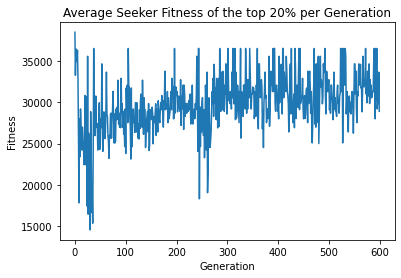

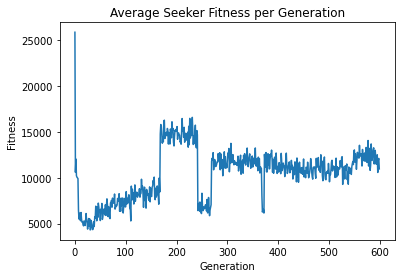

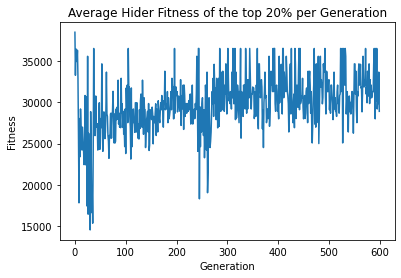

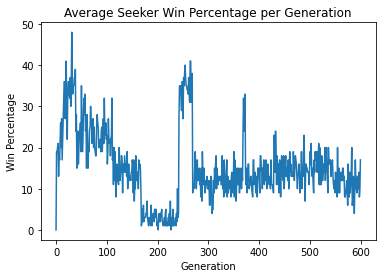

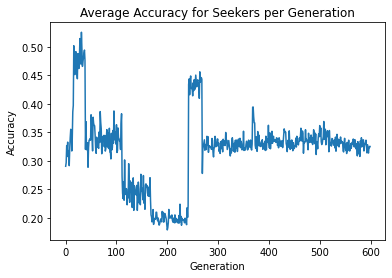

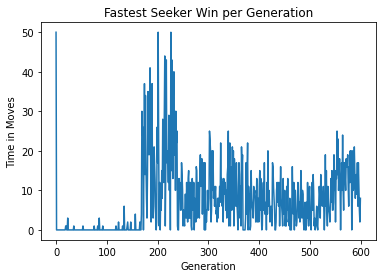

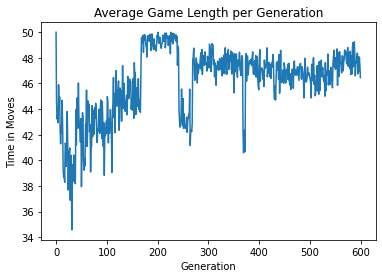

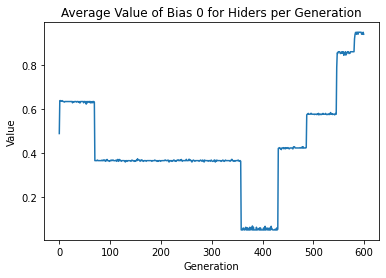

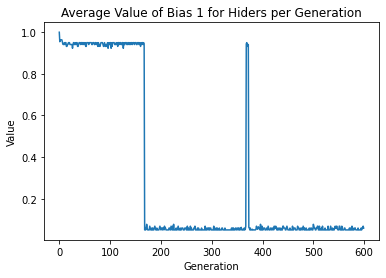

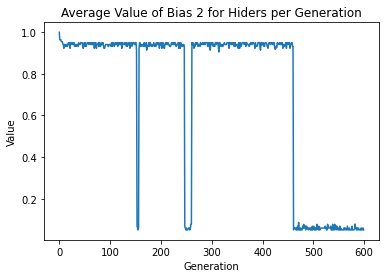

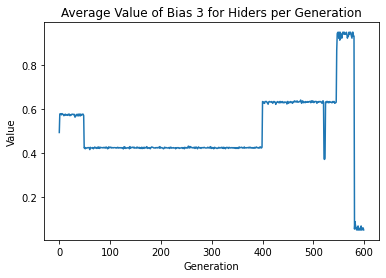

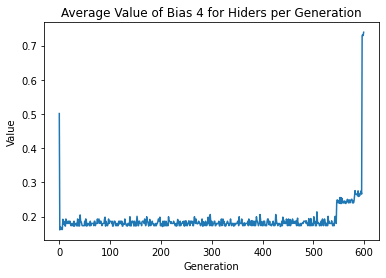

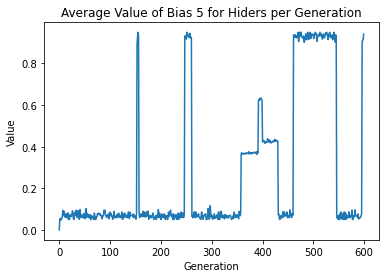

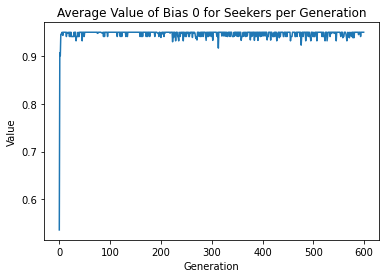

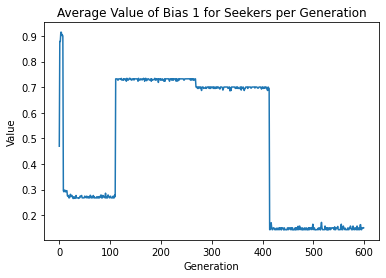

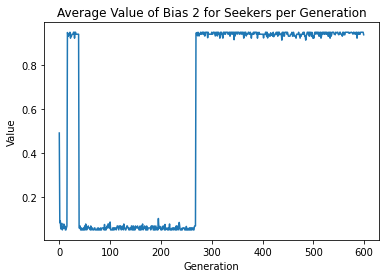

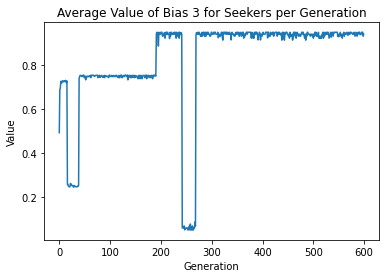

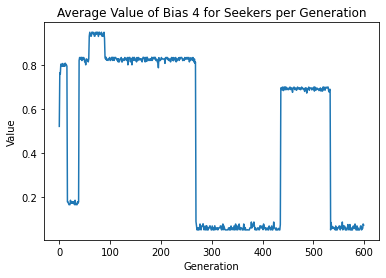

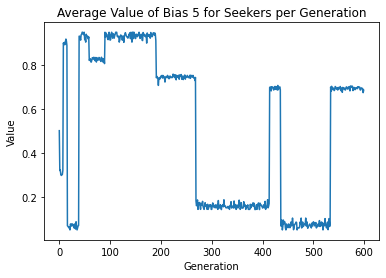

In [22]:
stats.printSeekFit()
stats.printSeekAvgFit()
stats.printHideFit()
stats.printSeekWin()
stats.printAvgSeekAcc()
stats.printFastestGame()
stats.printAverageGame()
stats.printAvgHideArr()
stats.printAvgSeekArr()